__Задача #9__

Создать собственную реализацию алгоритма Гирвана-Ньюмена. Для нее выполнить визуализацию шагов алгоритма, показав меру посреднечества связей (цветом или толщиной) и результат каждого шага алгоритма.  

In [1]:
import networkx as nx
import networkx.algorithms.centrality as nc
import matplotlib.pyplot as plt

In [2]:
def gn(G, c = None):
    """
    Параметры функции: граф и количество сообществ, на которые надо разделить граф. 
        По умолчанию значение c = None.
    На выходе: визуализация каждого шага, в заголовке указано количество сообществ на данном шаге, 
        а также номер шага.
    """        
    if len(G.nodes) <= 1: #проверка на количество узлов (если 0 или 1, то выводится пустой граф или граф с одним узлом)
        nx.draw(G)
    
    if c is None: #количество сообществ = количество узлов
        c = G.number_of_nodes()
    elif c > G.number_of_nodes(): #не может быть сообществ больше, чем узлов
        c = G.number_of_nodes() 
            
    pos = nx.spring_layout(G) #позиции узлов
    
    n = len(list(nx.connected_components(G))) #количество сообществ (subgraphs)
    count = 0 #счетчик шагов
    
    while n < c: #пока количество сообществ меньше заданного
        if G.number_of_edges() == 0:
            break #в случае отстутствия связей прервать цикл
            
        ebc = nc.edge_betweenness(G) #словарь мер посреднечества связей
        maxc_b = 0 
        medge = []
        for k, v in iter(ebc.items()):
            print(k, v)
            if maxc_b < v: #получаем связь(связи) с максимальной мерой
                medge, maxc_b = k,v 
        print(medge)
        G.remove_edge(*medge) #удаление связи
            
        n = len(list(nx.connected_components(G)))
        count += 1
        plt.figure(figsize = (8,6))
        plt.title(f'Количество сообществ: {n}, шаг {count}')  
                
        colors = []
        for k in G.edges:
            colors.append(plt.cm.hot(ebc[k]/maxc_b))#из палитры winter выбирается цвет, подходящий для данного числа (нормированные меры связи) 
            
        nx.draw(G, pos, edge_color=colors, node_color = 'palegreen', with_labels=True)
        plt.show()

(0, 7) 0.029944178628389162
(0, 9) 0.02555821371610845
(0, 11) 0.032011847801321484
(0, 17) 0.025393028024606967
(1, 2) 0.030668527379053703
(1, 4) 0.022761449077238552
(1, 5) 0.021092503987240826
(1, 6) 0.04122237411711096
(1, 8) 0.04865914786967419
(1, 10) 0.02986443381180223
(1, 14) 0.03504385964912281
(1, 16) 0.03607579554947976
(1, 19) 0.03460355434039644
(2, 4) 0.021491228070175433
(2, 5) 0.017836257309941518
(2, 9) 0.04253151818941292
(2, 14) 0.014473684210526316
(2, 15) 0.022827903091060985
(3, 4) 0.021491228070175436
(3, 7) 0.032236842105263154
(3, 10) 0.02706766917293233
(3, 12) 0.028997493734335838
(3, 13) 0.03733082706766917
(3, 14) 0.023245614035087715
(3, 15) 0.03383458646616541
(3, 19) 0.029605263157894735
(4, 5) 0.009649122807017543
(4, 7) 0.017145135566188196
(4, 11) 0.025374041163514847
(4, 13) 0.025020885547201336
(4, 16) 0.018128654970760234
(5, 7) 0.02635566188197767
(5, 13) 0.02997076023391813
(5, 14) 0.022807017543859647
(5, 16) 0.022076023391812867
(6, 7) 0.0282

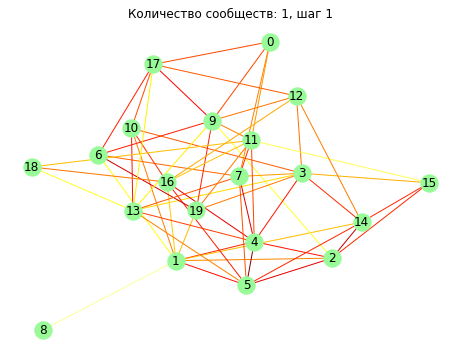

(0, 7) 0.029625199362041478
(0, 9) 0.025239234449760766
(0, 11) 0.03344725449988607
(0, 17) 0.02459557985873775
(1, 2) 0.033778575225943644
(1, 4) 0.032615629984051035
(1, 5) 0.028149920255183414
(1, 6) 0.04879813169286852
(1, 8) 0.09999999999999999
(1, 10) 0.039114832535885165
(1, 14) 0.038815789473684206
(1, 16) 0.04439887597782334
(1, 19) 0.039633173843700166
(2, 4) 0.021491228070175433
(2, 5) 0.017836257309941518
(2, 9) 0.044764373053846736
(2, 14) 0.014473684210526316
(2, 15) 0.02370509607351712
(3, 4) 0.022807017543859647
(3, 7) 0.032236842105263154
(3, 10) 0.02838345864661654
(3, 12) 0.02794486215538847
(3, 13) 0.02926065162907268
(3, 14) 0.024561403508771926
(3, 15) 0.03208020050125313
(3, 19) 0.030921052631578946
(4, 5) 0.009649122807017543
(4, 7) 0.019377990430622008
(4, 11) 0.026103136629452416
(4, 13) 0.023830409356725146
(4, 16) 0.018128654970760234
(5, 7) 0.028588516746411483
(5, 13) 0.029532163742690055
(5, 14) 0.022807017543859647
(5, 16) 0.022076023391812867
(6, 7) 0.0

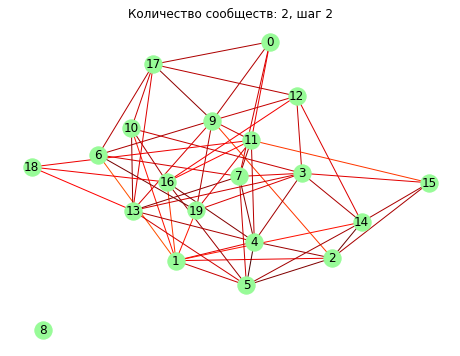

(0, 7) 0.028189792663476876
(0, 9) 0.023803827751196174
(0, 11) 0.032011847801321484
(0, 17) 0.023638642059694688
(1, 2) 0.023650983519404575
(1, 4) 0.019816586921850076
(1, 5) 0.018899521531100475
(1, 6) 0.035959216222374114
(1, 10) 0.02767145135566188
(1, 14) 0.026973684210526316
(1, 16) 0.02900812637654743
(1, 19) 0.028588516746411483
(2, 4) 0.021491228070175433
(2, 5) 0.017836257309941518
(2, 9) 0.04253151818941292
(2, 14) 0.014473684210526316
(2, 15) 0.021073517126148706
(3, 4) 0.021491228070175436
(3, 7) 0.032236842105263154
(3, 10) 0.02706766917293233
(3, 12) 0.02794486215538847
(3, 13) 0.02926065162907268
(3, 14) 0.023245614035087715
(3, 15) 0.03208020050125313
(3, 19) 0.029605263157894735
(4, 5) 0.009649122807017543
(4, 7) 0.017145135566188196
(4, 11) 0.023870281765018608
(4, 13) 0.022076023391812867
(4, 16) 0.018128654970760234
(5, 7) 0.02635566188197767
(5, 13) 0.027777777777777776
(5, 14) 0.022807017543859647
(5, 16) 0.022076023391812867
(6, 7) 0.02829801777170199
(6, 9) 0.

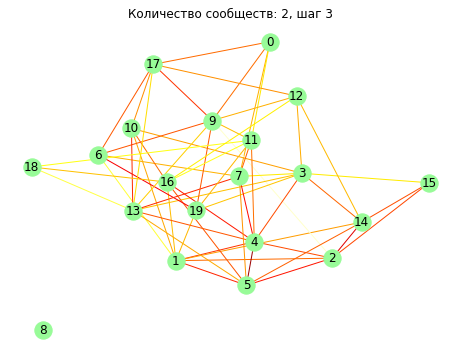

(0, 7) 0.03117224880382776
(0, 9) 0.026786283891547052
(0, 11) 0.025119617224880382
(0, 17) 0.023062200956937798
(1, 2) 0.02470361509835194
(1, 4) 0.020221445221445217
(1, 5) 0.018899521531100475
(1, 6) 0.03674868990658465
(1, 10) 0.02767145135566188
(1, 14) 0.029343229869545663
(1, 16) 0.03083111333111333
(1, 19) 0.02899337504600662
(2, 4) 0.02550719748088169
(2, 5) 0.0185672514619883
(2, 9) 0.05114648509385352
(2, 14) 0.015458839406207828
(2, 15) 0.029824561403508774
(3, 4) 0.024849302744039587
(3, 7) 0.03996626180836707
(3, 10) 0.027953216374269004
(3, 12) 0.028830409356725147
(3, 13) 0.035
(3, 14) 0.024811066126855602
(3, 15) 0.051403508771929826
(3, 19) 0.034527665317139
(4, 5) 0.010053981106612684
(4, 7) 0.017145135566188196
(4, 11) 0.027229481045270523
(4, 13) 0.022149122807017543
(4, 16) 0.019371345029239765
(5, 7) 0.026935958778064043
(5, 13) 0.02802631578947368
(5, 14) 0.02513270355375619
(5, 16) 0.023899010346378768
(6, 7) 0.02803485987696515
(6, 9) 0.021894508999772154
(6, 

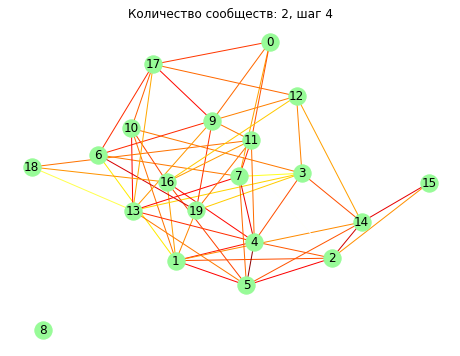

(0, 7) 0.028540669856459335
(0, 9) 0.02941786283891547
(0, 11) 0.025119617224880382
(0, 17) 0.023062200956937798
(1, 2) 0.02917280088332719
(1, 4) 0.020221445221445217
(1, 5) 0.018899521531100475
(1, 6) 0.038152198678514465
(1, 10) 0.03118022328548644
(1, 14) 0.03381241565452092
(1, 16) 0.032225625251941045
(1, 19) 0.031624953993375046
(2, 4) 0.034470310391363015
(2, 5) 0.022037786774628875
(2, 9) 0.06081585081585082
(2, 14) 0.01633603238866397
(2, 15) 0.05376518218623482
(3, 4) 0.02145748987854251
(3, 7) 0.03128205128205129
(3, 10) 0.022807017543859647
(3, 12) 0.024561403508771937
(3, 13) 0.02487854251012146
(3, 14) 0.03679487179487179
(3, 19) 0.028475033738191633
(4, 5) 0.010053981106612684
(4, 7) 0.018460925039872407
(4, 11) 0.028160655134339345
(4, 13) 0.023606612685560052
(4, 16) 0.01948380566801619
(5, 7) 0.029567537725432465
(5, 13) 0.030941295546558698
(5, 14) 0.028603238866396763
(5, 16) 0.02529352226720648
(6, 7) 0.02698222829801778
(6, 9) 0.02259626338573707
(6, 17) 0.022282

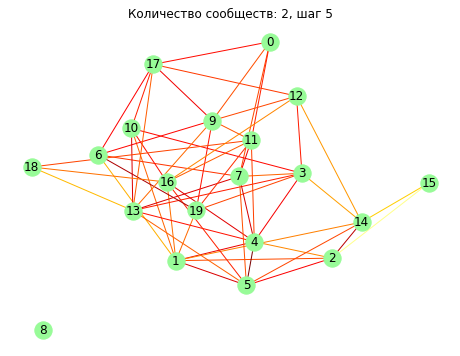

(0, 7) 0.035726817042606517
(0, 9) 0.018471177944862156
(0, 11) 0.027769423558897246
(0, 17) 0.024172932330827065
(1, 2) 0.03767145135566189
(1, 4) 0.020350877192982453
(1, 5) 0.018947368421052626
(1, 6) 0.04548872180451127
(1, 10) 0.03228070175438596
(1, 14) 0.0353030303030303
(1, 16) 0.03267372977899294
(1, 19) 0.03701754385964912
(2, 4) 0.047851446798815214
(2, 5) 0.0255684666210982
(2, 14) 0.016842105263157894
(2, 15) 0.040214171793119154
(3, 4) 0.021491228070175436
(3, 7) 0.032330827067669175
(3, 10) 0.022807017543859647
(3, 12) 0.024561403508771937
(3, 13) 0.025215311004784687
(3, 14) 0.038686488949646845
(3, 19) 0.02894736842105263
(4, 5) 0.010087719298245612
(4, 7) 0.021015037593984962
(4, 11) 0.038160173160173165
(4, 13) 0.02784688995215311
(4, 16) 0.019776714513556618
(5, 7) 0.03317042606516291
(5, 13) 0.03727272727272727
(5, 14) 0.03012987012987013
(5, 16) 0.02569377990430622
(6, 7) 0.027030075187969932
(6, 9) 0.020012531328320798
(6, 17) 0.023383458646616537
(6, 19) 0.01478

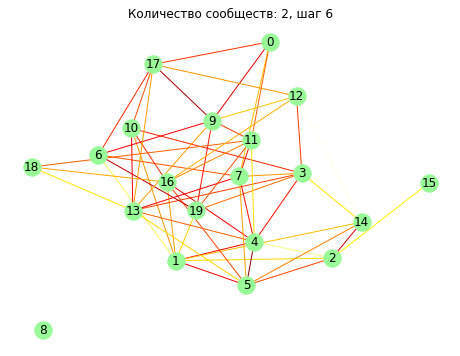

(0, 7) 0.036228070175438595
(0, 9) 0.017719298245614034
(0, 11) 0.028771929824561403
(0, 17) 0.023421052631578947
(1, 2) 0.055087719298245616
(1, 4) 0.020350877192982453
(1, 5) 0.018947368421052626
(1, 6) 0.047418546365914784
(1, 10) 0.03508771929824561
(1, 14) 0.025175438596491226
(1, 16) 0.032593984962406015
(1, 19) 0.039649122807017545
(2, 4) 0.06
(2, 5) 0.03543859649122807
(2, 14) 0.03192982456140351
(2, 15) 0.09473684210526316
(3, 4) 0.024122807017543862
(3, 7) 0.030263157894736843
(3, 10) 0.021052631578947364
(3, 12) 0.024561403508771937
(3, 13) 0.023421052631578943
(3, 14) 0.028684210526315784
(3, 19) 0.027192982456140352
(4, 5) 0.010087719298245612
(4, 7) 0.023333333333333334
(4, 11) 0.040438596491228065
(4, 13) 0.03149122807017543
(4, 16) 0.021052631578947368
(5, 7) 0.03342105263157895
(5, 13) 0.03912280701754386
(5, 14) 0.022280701754385963
(5, 16) 0.025614035087719294
(6, 7) 0.027030075187969932
(6, 9) 0.02088972431077694
(6, 17) 0.024436090225563905
(6, 19) 0.01478696741854

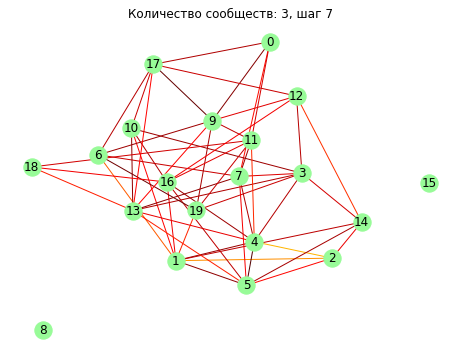

In [67]:
gr = nx.erdos_renyi_graph(20,0.4)
gn(gr, 3)

(0, 1) 0.025252525252525245
(0, 2) 0.0777876807288572
(0, 3) 0.02049910873440285
(0, 4) 0.0522875816993464
(0, 5) 0.07813428401663694
(0, 6) 0.07813428401663695
(0, 7) 0.0228206434088787
(0, 8) 0.07423959482783014
(0, 10) 0.0522875816993464
(0, 11) 0.058823529411764705
(0, 12) 0.04652406417112298
(0, 13) 0.04237189825425121
(0, 17) 0.04012392835922248
(0, 19) 0.045936960642843
(0, 21) 0.040123928359222474
(0, 31) 0.1272599949070537
(1, 2) 0.023232323232323233
(1, 3) 0.0077243018419489
(1, 7) 0.007422969187675069
(1, 13) 0.01240556828792123
(1, 17) 0.01869960105254222
(1, 19) 0.014633732280791102
(1, 21) 0.01869960105254222
(1, 30) 0.032280791104320514
(2, 3) 0.022430184194890075
(2, 7) 0.025214328155504617
(2, 8) 0.009175791528732704
(2, 9) 0.030803836686189627
(2, 13) 0.007630931160342923
(2, 27) 0.04119203236850296
(2, 28) 0.02278244631185807
(2, 32) 0.06898678663384543
(3, 7) 0.003365588659706307
(3, 12) 0.012299465240641705
(3, 13) 0.01492233256939139
(4, 6) 0.0047534165181224
(4, 

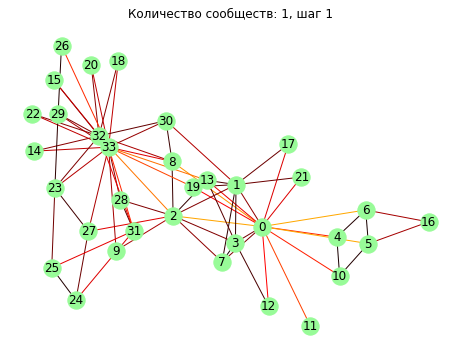

(0, 1) 0.0207961972667855
(0, 2) 0.11924273983097515
(0, 3) 0.0160427807486631
(0, 4) 0.0522875816993464
(0, 5) 0.07813428401663694
(0, 6) 0.07813428401663694
(0, 7) 0.018173003467121113
(0, 8) 0.09923105217222859
(0, 10) 0.0522875816993464
(0, 11) 0.058823529411764705
(0, 12) 0.04296324590442237
(0, 13) 0.053609897727544764
(0, 17) 0.035650623885918
(0, 19) 0.05702641584994525
(0, 21) 0.035650623885918
(1, 2) 0.02971342383107089
(1, 3) 0.0077243018419489
(1, 7) 0.007477816301345713
(1, 13) 0.01415218768159945
(1, 17) 0.0231729055258467
(1, 19) 0.016380351674469322
(1, 21) 0.0231729055258467
(1, 30) 0.03576423576423577
(2, 3) 0.02840024898848428
(2, 7) 0.02978883861236802
(2, 8) 0.009283200459671048
(2, 9) 0.030822119057413173
(2, 13) 0.007797757797757796
(2, 27) 0.06729817023934669
(2, 28) 0.038191655838714665
(2, 32) 0.08791752909399968
(3, 7) 0.0033838710309298547
(3, 12) 0.01586028350734233
(3, 13) 0.016987696399461103
(4, 6) 0.0047534165181224
(4, 10) 0.0029708853238265
(5, 6) 0.0

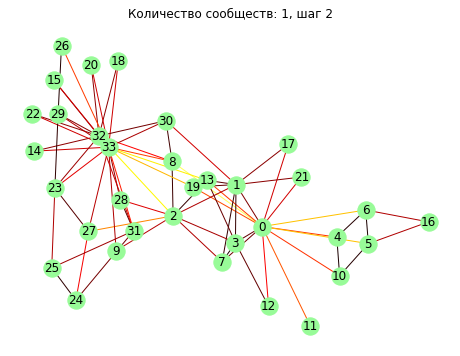

(0, 1) 0.029010695187165772
(0, 3) 0.024257278669043366
(0, 4) 0.0522875816993464
(0, 5) 0.07813428401663694
(0, 6) 0.07813428401663694
(0, 7) 0.026387501387501382
(0, 8) 0.13782067605597018
(0, 10) 0.0522875816993464
(0, 11) 0.058823529411764705
(0, 12) 0.03715304303539596
(0, 13) 0.07645491763138822
(0, 17) 0.029734317969612078
(0, 19) 0.07076567223626047
(0, 21) 0.029734317969612085
(1, 2) 0.04866750896162661
(1, 3) 0.0077243018419489
(1, 7) 0.007477816301345713
(1, 13) 0.014573988103399872
(1, 17) 0.02908921144215263
(1, 19) 0.017693417693417694
(1, 21) 0.029089211442152624
(1, 30) 0.03690492514021926
(2, 3) 0.04199770817417876
(2, 7) 0.038003336532748296
(2, 8) 0.01749769838005132
(2, 9) 0.026142974672386434
(2, 13) 0.01601225571813807
(2, 27) 0.05063416975181681
(2, 28) 0.02993003728297846
(2, 32) 0.05547459076870843
(3, 7) 0.0033838710309298547
(3, 12) 0.021670486376368717
(3, 13) 0.017414938003173293
(4, 6) 0.0047534165181224
(4, 10) 0.0029708853238265
(5, 6) 0.0029708853238265

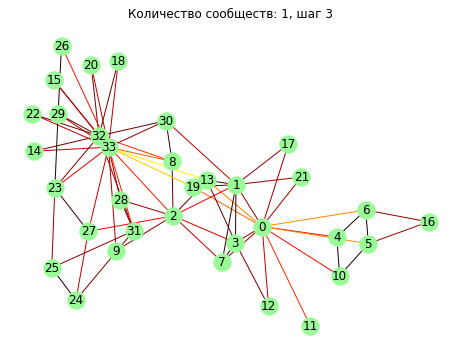

(0, 1) 0.044786096256684484
(0, 3) 0.02963458110516933
(0, 4) 0.05228758169934641
(0, 5) 0.07813428401663695
(0, 6) 0.07813428401663695
(0, 7) 0.031542803601627124
(0, 10) 0.05228758169934641
(0, 11) 0.058823529411764705
(0, 12) 0.031188894290498557
(0, 13) 0.12320259255616288
(0, 17) 0.02450905495888194
(0, 19) 0.1109476905953786
(0, 21) 0.024509054958881945
(1, 2) 0.058845162910906856
(1, 3) 0.00802139037433155
(1, 7) 0.007541478129713424
(1, 13) 0.01577008151402615
(1, 17) 0.034314474452882764
(1, 19) 0.018889511104043973
(1, 21) 0.034314474452882764
(1, 30) 0.05211011595094638
(2, 3) 0.053346104281933156
(2, 7) 0.04530028794734676
(2, 8) 0.022376316493963554
(2, 9) 0.026684100213511978
(2, 13) 0.022599132893250537
(2, 27) 0.05257240574950546
(2, 28) 0.03074530586326749
(2, 32) 0.0662397841227662
(3, 7) 0.003405091640385758
(3, 12) 0.027634635121266134
(3, 13) 0.01891465634781143
(4, 6) 0.0047534165181224
(4, 10) 0.0029708853238265
(5, 6) 0.0029708853238265003
(5, 10) 0.004753416518

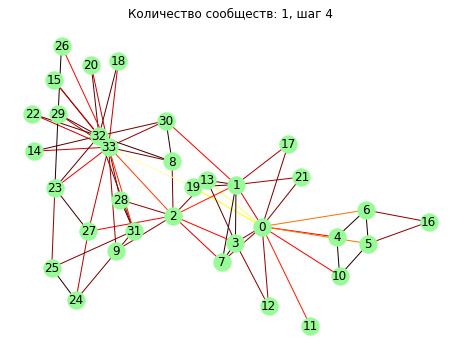

(0, 1) 0.04774212715389185
(0, 3) 0.03241731035848683
(0, 4) 0.0522875816993464
(0, 5) 0.07813428401663694
(0, 6) 0.07813428401663694
(0, 7) 0.03375420875420875
(0, 10) 0.0522875816993464
(0, 11) 0.058823529411764705
(0, 12) 0.03200067905950259
(0, 13) 0.03375420875420875
(0, 17) 0.022912381735911144
(0, 19) 0.19204112880583465
(0, 21) 0.022912381735911144
(1, 2) 0.06424321370845436
(1, 3) 0.008863141216082393
(1, 7) 0.007526242820360467
(1, 13) 0.007526242820360467
(1, 17) 0.03591114767585355
(1, 19) 0.02406032766995334
(1, 21) 0.03591114767585355
(1, 30) 0.06082119009926496
(2, 3) 0.06914311179017063
(2, 7) 0.048113487819370165
(2, 8) 0.025534759358288774
(2, 9) 0.030317884729649434
(2, 13) 0.048113487819370165
(2, 27) 0.062388992469206365
(2, 28) 0.036653498017134384
(2, 32) 0.09492018676510654
(3, 7) 0.0031194295900178253
(3, 12) 0.026822850352262118
(3, 13) 0.0031194295900178253
(4, 6) 0.0047534165181224
(4, 10) 0.0029708853238265
(5, 6) 0.0029708853238265003
(5, 10) 0.00475341651

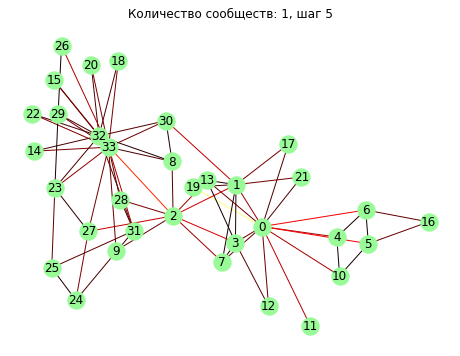

(0, 1) 0.1298446651387828
(0, 3) 0.055808080808080786
(0, 4) 0.05228758169934641
(0, 5) 0.07813428401663695
(0, 6) 0.07813428401663695
(0, 7) 0.05714497920380271
(0, 10) 0.05228758169934641
(0, 11) 0.058823529411764705
(0, 12) 0.02186783804430863
(0, 13) 0.05714497920380271
(0, 17) 0.01871657754010695
(0, 19) 0.01871657754010695
(0, 21) 0.01871657754010695
(1, 2) 0.10938304614775203
(1, 3) 0.009050589932942874
(1, 7) 0.007236227824463118
(1, 13) 0.007236227824463118
(1, 17) 0.040106951871657755
(1, 19) 0.040106951871657755
(1, 21) 0.040106951871657755
(1, 30) 0.15212489036018448
(2, 3) 0.10332102537984895
(2, 7) 0.07263602410661234
(2, 8) 0.02895976572447161
(2, 9) 0.035466004583651636
(2, 13) 0.07263602410661234
(2, 27) 0.08467376849729791
(2, 28) 0.05045907251789604
(2, 32) 0.1786195286195287
(3, 7) 0.0031194295900178253
(3, 12) 0.03695569136745607
(3, 13) 0.0031194295900178253
(4, 6) 0.0047534165181224
(4, 10) 0.0029708853238265
(5, 6) 0.0029708853238265003
(5, 10) 0.004753416518122

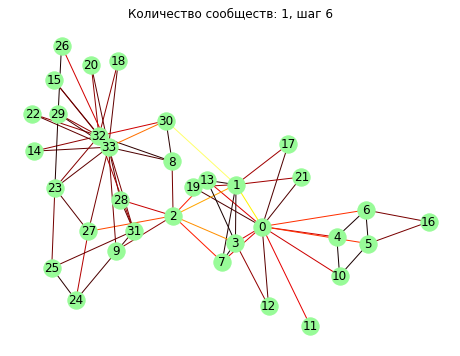

(0, 1) 0.18108783917607446
(0, 3) 0.039743018419489
(0, 4) 0.05228758169934641
(0, 5) 0.07813428401663695
(0, 6) 0.07813428401663695
(0, 7) 0.04107991681521092
(0, 10) 0.05228758169934641
(0, 11) 0.058823529411764705
(0, 12) 0.024915824915824912
(0, 13) 0.04107991681521092
(0, 17) 0.01871657754010695
(0, 19) 0.01871657754010695
(0, 21) 0.01871657754010695
(1, 2) 0.07250763941940411
(1, 3) 0.016143224966754376
(1, 7) 0.011280875986758341
(1, 13) 0.011280875986758341
(1, 17) 0.040106951871657755
(1, 19) 0.040106951871657755
(1, 21) 0.040106951871657755
(1, 30) 0.25601957954899124
(2, 3) 0.07711534108592932
(2, 7) 0.052526313555725304
(2, 8) 0.050618227088815325
(2, 9) 0.043149279913985795
(2, 13) 0.052526313555725304
(2, 27) 0.10708485414367769
(2, 28) 0.06927185015420309
(3, 7) 0.0031194295900178253
(3, 12) 0.033907704495939786
(3, 13) 0.0031194295900178253
(4, 6) 0.0047534165181224
(4, 10) 0.0029708853238265
(5, 6) 0.0029708853238265003
(5, 10) 0.0047534165181224
(5, 16) 0.029411764705

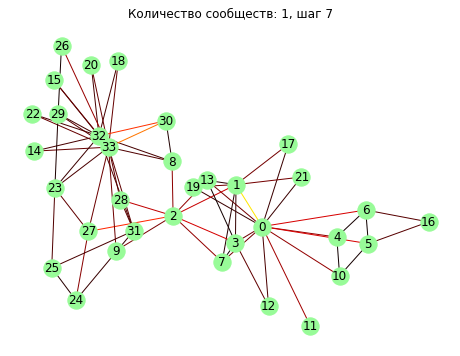

(0, 1) 0.07263814616755793
(0, 3) 0.07442067736185383
(0, 4) 0.0522875816993464
(0, 5) 0.07813428401663694
(0, 6) 0.07813428401663695
(0, 7) 0.07575757575757576
(0, 10) 0.0522875816993464
(0, 11) 0.058823529411764705
(0, 12) 0.02049910873440285
(0, 13) 0.07575757575757576
(0, 17) 0.01871657754010695
(0, 19) 0.01871657754010695
(0, 21) 0.01871657754010695
(1, 2) 0.1947415329768271
(1, 3) 0.0053475935828877
(1, 7) 0.004901960784313725
(1, 13) 0.004901960784313725
(1, 17) 0.040106951871657755
(1, 19) 0.040106951871657755
(1, 21) 0.040106951871657755
(2, 3) 0.12700534759358287
(2, 7) 0.09358288770053476
(2, 8) 0.16948900772430184
(2, 9) 0.07932263814616755
(2, 13) 0.09358288770053476
(2, 27) 0.16057635175282234
(2, 28) 0.11675579322638145
(3, 7) 0.0031194295900178253
(3, 12) 0.03832442067736185
(3, 13) 0.0031194295900178253
(4, 6) 0.0047534165181224
(4, 10) 0.0029708853238265
(5, 6) 0.0029708853238265003
(5, 10) 0.0047534165181224
(5, 16) 0.029411764705882353
(6, 16) 0.029411764705882353
(

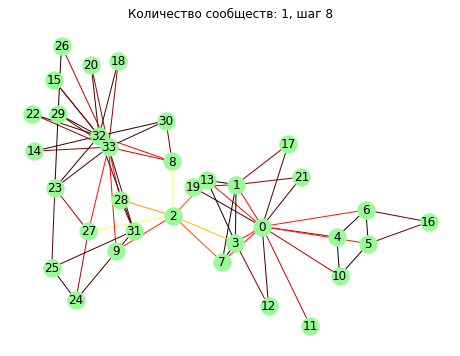

(0, 1) 0.013368983957219251
(0, 3) 0.11111111111111106
(0, 4) 0.0522875816993464
(0, 5) 0.07813428401663694
(0, 6) 0.07813428401663694
(0, 7) 0.11244800950683298
(0, 10) 0.0522875816993464
(0, 11) 0.058823529411764705
(0, 12) 0.02049910873440285
(0, 13) 0.11244800950683298
(0, 17) 0.035650623885918
(0, 19) 0.035650623885918
(0, 21) 0.035650623885918
(1, 3) 0.03357100415923946
(1, 7) 0.033125371360665484
(1, 13) 0.033125371360665484
(1, 17) 0.0231729055258467
(1, 19) 0.0231729055258467
(1, 21) 0.0231729055258467
(2, 3) 0.19191919191919182
(2, 7) 0.1584967320261437
(2, 8) 0.16948900772430184
(2, 9) 0.07932263814616757
(2, 13) 0.1584967320261437
(2, 27) 0.16057635175282234
(2, 28) 0.11675579322638145
(3, 7) 0.0031194295900178253
(3, 12) 0.03832442067736185
(3, 13) 0.0031194295900178253
(4, 6) 0.0047534165181224
(4, 10) 0.0029708853238265
(5, 6) 0.0029708853238265003
(5, 10) 0.0047534165181224
(5, 16) 0.029411764705882353
(6, 16) 0.029411764705882353
(8, 30) 0.0303030303030303
(8, 32) 0.07

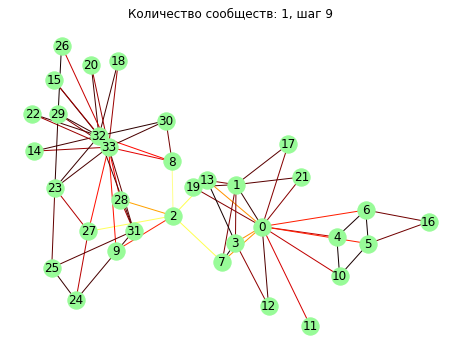

(0, 1) 0.013368983957219251
(0, 3) 0.01515151515151515
(0, 4) 0.0522875816993464
(0, 5) 0.07813428401663694
(0, 6) 0.07813428401663695
(0, 7) 0.16889483065953653
(0, 10) 0.0522875816993464
(0, 11) 0.058823529411764705
(0, 12) 0.0374331550802139
(0, 13) 0.16889483065953653
(0, 17) 0.035650623885918
(0, 19) 0.035650623885918
(0, 21) 0.035650623885918
(1, 3) 0.0053475935828877
(1, 7) 0.04723707664884135
(1, 13) 0.04723707664884135
(1, 17) 0.0231729055258467
(1, 19) 0.0231729055258467
(1, 21) 0.0231729055258467
(2, 7) 0.25445632798573975
(2, 8) 0.16948900772430184
(2, 9) 0.07932263814616757
(2, 13) 0.25445632798573975
(2, 27) 0.16057635175282234
(2, 28) 0.11675579322638145
(3, 7) 0.0285204991087344
(3, 12) 0.0213903743315508
(3, 13) 0.0285204991087344
(4, 6) 0.0047534165181224
(4, 10) 0.0029708853238265
(5, 6) 0.0029708853238265003
(5, 10) 0.0047534165181224
(5, 16) 0.029411764705882353
(6, 16) 0.029411764705882353
(8, 30) 0.0303030303030303
(8, 32) 0.07204396910279263
(8, 33) 0.0626856803

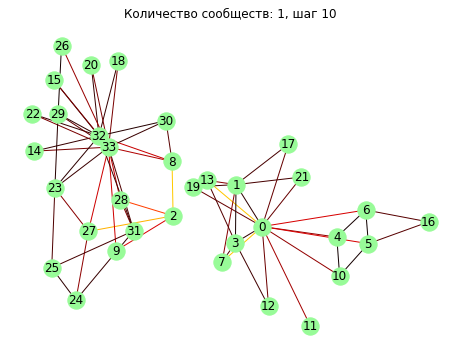

(0, 1) 0.013368983957219251
(0, 3) 0.01515151515151515
(0, 4) 0.0522875816993464
(0, 5) 0.07813428401663694
(0, 6) 0.07813428401663694
(0, 7) 0.027926322043969082
(0, 10) 0.0522875816993464
(0, 11) 0.058823529411764705
(0, 12) 0.0374331550802139
(0, 13) 0.33273915626856787
(0, 17) 0.035650623885918
(0, 19) 0.035650623885918
(0, 21) 0.035650623885918
(1, 3) 0.0053475935828877
(1, 7) 0.01633986928104575
(1, 13) 0.10101010101010097
(1, 17) 0.0231729055258467
(1, 19) 0.0231729055258467
(1, 21) 0.0231729055258467
(2, 8) 0.16948900772430184
(2, 9) 0.07932263814616755
(2, 13) 0.5080213903743315
(2, 27) 0.16057635175282234
(2, 28) 0.11675579322638145
(3, 7) 0.014557338086749859
(3, 12) 0.0213903743315508
(3, 13) 0.065359477124183
(4, 6) 0.0047534165181224
(4, 10) 0.0029708853238265
(5, 6) 0.0029708853238265003
(5, 10) 0.0047534165181224
(5, 16) 0.029411764705882353
(6, 16) 0.029411764705882353
(8, 30) 0.0303030303030303
(8, 32) 0.07204396910279263
(8, 33) 0.06268568033273916
(9, 33) 0.07456922

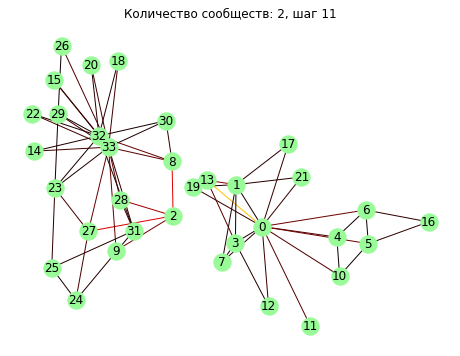

In [3]:
gr2 = nx.karate_club_graph()
gn(gr2, 2)